# **RNN Introduction**


## Importing required libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Loading and preprocessing the data
### Dataset 4-Deep learning/5-Time Series Forecasting (RNN)/LAB/ٌDatasets/traffic.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/T5 - Bootcamp/data/نسخة من traffic.csv",
                 usecols=[0, 2]).reset_index()

In [ ]:
df.head()

,index,DateTime,Vehicles
0,0,2015-11-01 00:00:00,15
1,1,2015-11-01 01:00:00,13
2,2,2015-11-01 02:00:00,10
3,3,2015-11-01 03:00:00,7
4,4,2015-11-01 04:00:00,9


In [ ]:
df["DateTime"] = pd.to_datetime(df["DateTime"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   index     48120 non-null  int64         
 1   DateTime  48120 non-null  datetime64[ns]
 2   Vehicles  48120 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.1 MB


## Visualization

Text(0, 0.5, 'Number of vehicles')

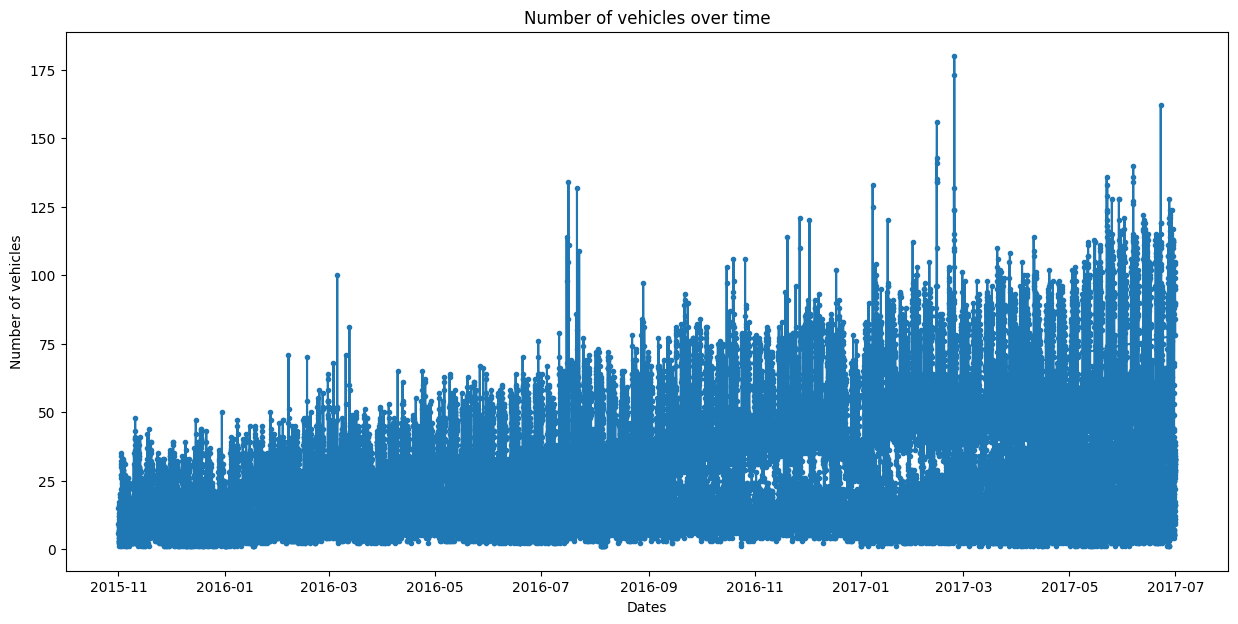

In [ ]:
plt.figure(figsize = (15, 7))

plt.title("Number of vehicles over time")

plt.plot(df["DateTime"], df["Vehicles"], marker=".")

plt.xlabel("Dates")
plt.ylabel("Number of vehicles")

In [ ]:
new_df = df.reset_index()["Vehicles"]

## Split the data into train and test

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(np.array(new_df).reshape(-1, 1))
# X_test_scaled = scaler.fit_transform(np.array(X_test).reshape(-1, 1))

In [ ]:
df_scaled.shape

(48120, 1)

In [ ]:
train_data = df_scaled[:int(df_scaled.shape[0] * 0.8)]

test_data = df_scaled[train_data.shape[0]:]

In [ ]:
train_data.shape

(38496, 1)

In [ ]:
n_past = 40

X_train, y_train = [], []
for i in range(n_past, len(train_data)):
  x = train_data[i - n_past:i, 0]
  X_train.append(x)
  y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)


X_test, y_test = [], []
for i in range(n_past, len(test_data)):
  x = test_data[i - n_past:i, 0]
  X_test.append(x)
  y_test.append(test_data[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)


In [ ]:
from sklearn.model_selection import train_test_split

# Ensure to set "shuffle=False" to maintain the sequence
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.1, shuffle=False, random_state=42
)


In [ ]:
print("Training set size:-")
print(X_train.shape), print(y_train.shape)
print("\n")
print("Validation set size:-")
print(X_valid.shape), print(y_valid.shape)
print("\n")
print("Testing set size:-")
print(X_test.shape), print(y_test.shape)

Training set size:-
(34610, 40)
(34610,)


Validation set size:-
(3846, 40)
(3846,)


Testing set size:-
(9584, 40)
(9584,)


(None, None)

## Modeling


In [ ]:
# Reshape input data for RNN([samples, time steps, features])
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
X_train.shape

(34610, 40, 1)

In [ ]:
from tensorflow import keras

from keras.models import Sequential
from keras import layers

In [ ]:
model = Sequential()

model.add(layers.SimpleRNN(units = 50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(layers.Dropout(0.2))

model.add(layers.SimpleRNN(units = 50))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(1))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 40, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 40, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,701 (30.08 KB)

 Trainable params: 7,701 (30.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
from keras.callbacks import EarlyStopping

# Defining our early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Training our RNN model
model.fit(X_train, y_train,
          validation_data=(X_valid, y_valid),
          epochs=10,
          batch_size=32,
          verbose=1,
          callbacks= [early_stopping])

Epoch 1/10
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 37s 31ms/step - loss: 0.0067 - val_loss: 0.0012
Epoch 2/10
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 31s 29ms/step - loss: 8.9492e-04 - val_loss: 0.0012
Epoch 3/10
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - loss: 7.8045e-04 - val_loss: 0.0012
Epoch 4/10
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - loss: 7.2768e-04 - val_loss: 0.0012
Epoch 5/10
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - loss: 7.2847e-04 - val_loss: 0.0011
Epoch 6/10
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - loss: 7.2171e-04 - val_loss: 0.0013
Epoch 7/10
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - loss: 7.2622e-04 - val_loss: 0.0012
Epoch 8/10
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - loss: 7.0803e-04 - val_loss: 0.0012
Epoch 9/10
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - loss: 6.9666e-04 - val_loss: 0.0012
Epoch 10/10
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - loss: 6.9810e-04 - val_loss: 0.0011


In [ ]:
train_pred = model.predict(X_train)
valid_pred = model.predict(X_valid)

1082/1082 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [ ]:
# Transform back to original form
train_pred=scaler.inverse_transform(train_pred)
valid_pred=scaler.inverse_transform(valid_pred)

In [ ]:
X_train.shape

(34610, 40, 1)

In [ ]:
train_pred.shape

(34610, 1)

In [ ]:
import math
from sklearn.metrics import mean_squared_error


# Calculate train data RMSE
print(math.sqrt(mean_squared_error(y_train, train_pred)))
# Calculate validation data RMSE
print(math.sqrt(mean_squared_error(y_valid, valid_pred)))

34.12418172377186
16.809477771119237


In [57]:
test_pred = model.predict(X_test)
test_pred=scaler.inverse_transform(test_pred)

300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


## Visualization of results


In [ ]:
new_df

,Vehicles
0,15
1,13
2,10
3,7
4,9
...,...
48115,11
48116,30
48117,16
48118,22


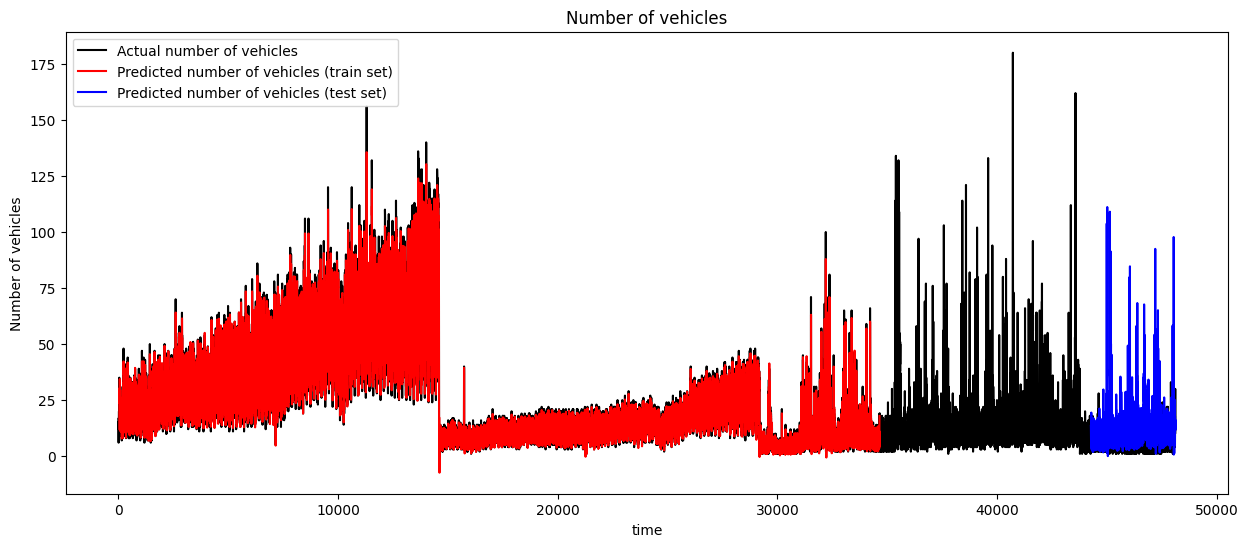

In [60]:

look_back = 40

trainPredictPlot = np.empty_like(new_df.astype(float))
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:len(train_pred)+look_back] = train_pred.flatten()

testPredictPlot = np.empty_like(new_df.astype(float))
testPredictPlot[:] = np.nan
test_start = len(new_df) - len(valid_pred)
testPredictPlot[test_start:] = valid_pred.flatten()

original_scaled_data = scaler.inverse_transform(df_scaled)

plt.figure(figsize=(15, 6))
plt.plot(original_scaled_data, color='black', label=f"Actual number of vehicles")
plt.plot(trainPredictPlot, color='red', label=f"Predicted number of vehicles (train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted number of vehicles (test set)")

plt.title(f"Number of vehicles")
plt.xlabel("time")
plt.ylabel(f"Number of vehicles")
plt.legend()
plt.show()